In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [9]:
# y = k*x + b
# y = k_1*x_1 + k_2*x_2 + ... + b

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [14]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1. Подберите скорость обучения (alpha) и количество итераций:

In [18]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [5]:
iter = 1000

In [6]:
alpha_list = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

In [15]:
finlist = []
for elem in alpha_list: 
  alpha = elem
  n = X.shape[1]

  W = np.array([1, 0.5])
  iter = 1000
  list_of_iter = []
  list_of_err = []
  for i in range(iter):
      y_pred = np.dot(W, X)
      err = calc_mse(y, y_pred)
      for ii in range(W.shape[0]):
          W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
      list_of_iter.append(i)
      list_of_err.append(err)
  pair = (list_of_iter, list_of_err)
  finlist.append(pair)

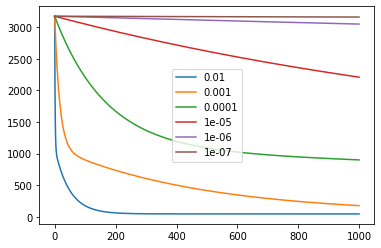

In [16]:
for i in range(len(finlist)):
  plt.plot(finlist[i][0], finlist[i][1], label=alpha_list[i])
plt.legend()

#Выводы

Очевидно, что в данном конкретном случае, можно пользоваться высокой скоростью обучения. На скорости в $0.01$ вполне достаточно 220 итераций для выхода на устойчивое плато.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [19]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 100 == 0:
        print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796256
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178
